In [ ]:
!pip uninstall -y nltk
!pip install --no-cache-dir nltk


Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.3 MB/s eta 0:00:00


In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# write a program to tokenise the sentence into the words.
import nltk
nltk.download('punkt')

def tokenize_sent(text):
  return nltk.word_tokenize(text)

text = "this is the sentence which I have to tokenize."
print(tokenize_sent(text))

['this', 'is', 'the', 'sentence', 'which', 'I', 'have', 'to', 'tokenize', '.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Write a word to tokenize to text into the sentences.
def tokenise_text(text):
  return nltk.sent_tokenize(text)

text = "this is the sentence which I have to tokenize. this is the second sentence."
print(tokenise_text(text))

['this is the sentence which I have to tokenize.', 'this is the second sentence.']


In [ ]:
# How can you remve the stopwords from a sentence.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(text)
  filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
  return filtered_text

text = "this is the sentence which I have to tokenize. And also I have remove the stop words from this sentence."
filtered_text = remove_stopwords(text)
print(filtered_text)

['sentence', 'tokenize', '.', 'also', 'remove', 'stop', 'words', 'sentence', '.']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# How to perform the stemming from a sentence.

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

def perform_stemming(text):
  stemmer = PorterStemmer()
  word_tokens = word_tokenize(text)
  stemmed_text = [stemmer.stem(word) for word in word_tokens]
  return stemmed_text

text = "this is the sentence which I have to tokenize. And also I have to perform the stemming on this sentence."
stemmed_text = perform_stemming(text)
print(stemmed_text)

['thi', 'is', 'the', 'sentenc', 'which', 'i', 'have', 'to', 'token', '.', 'and', 'also', 'i', 'have', 'to', 'perform', 'the', 'stem', 'on', 'thi', 'sentenc', '.']


In [ ]:
# How do you perform the lemmetization from on a word.
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def perfomr_stemming(text):
  stemmer = WordNetLemmatizer()
  word_tokens = word_tokenize(text)
  stemmed_text = [stemmer.lemmatize(word) for word in word_tokens]
  return stemmed_text

text = "this is the sentence which I have to tokenize. And also I have to perform the stemming on this sentence."
stemmed_text = perfomr_stemming(text)
print(stemmed_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...


['this', 'is', 'the', 'sentence', 'which', 'I', 'have', 'to', 'tokenize', '.', 'And', 'also', 'I', 'have', 'to', 'perform', 'the', 'stemming', 'on', 'this', 'sentence', '.']


In [ ]:
import os
import shutil

# Define the path
punkt_path = "/root/nltk_data/tokenizers/punkt"

# Remove any unnecessary or corrupt files
if os.path.exists(punkt_path):
    shutil.rmtree(punkt_path)  # Delete the folder
    print("Deleted old 'punkt' folder.")

# Re-download 'punkt'
import nltk
nltk.download('punkt', download_dir='/root/nltk_data')

print("Re-downloaded 'punkt'.")


Deleted old 'punkt' folder.
Re-downloaded 'punkt'.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [1]:
# How can you normalise the tet by converting it into the lowercase and removing punctuations?

import re

def normalise(text):
  text = text.lower()
  text = re.sub(r'[^\w\s]','',text)
  return text

input_text = "Hello, World! This is a sample text."
output_text = normalise(input_text)
print(output_text)

hello world this is a sample text


In [2]:
# How can you create a co-occurrence matrix for words in a corpus?
import numpy as np
import pandas as pd
import re
from collections import defaultdict
from itertools import combinations

def preprocess(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = text.split()  # Tokenize text
    return words

def create_cooccurrence_matrix(corpus, window_size=2):
    words = preprocess(corpus)
    vocab = list(set(words))  # Unique words
    word_to_index = {word: i for i, word in enumerate(vocab)}  # Word to index mapping

    # Initialize co-occurrence matrix
    matrix = np.zeros((len(vocab), len(vocab)), dtype=int)

    # Populate co-occurrence matrix
    for i, word in enumerate(words):
        start = max(i - window_size, 0)
        end = min(i + window_size + 1, len(words))
        window_words = words[start:end]

        for w1, w2 in combinations(window_words, 2):  # Get word pairs
            if w1 != w2:
                idx1, idx2 = word_to_index[w1], word_to_index[w2]
                matrix[idx1][idx2] += 1
                matrix[idx2][idx1] += 1  # Since it's a symmetric matrix

    # Convert to DataFrame for better visualization
    co_matrix_df = pd.DataFrame(matrix, index=vocab, columns=vocab)
    return co_matrix_df

# Example Corpus
corpus = "This is a sample text. This text is a simple example."

# Create Co-occurrence Matrix
co_matrix = create_cooccurrence_matrix(corpus, window_size=2)
print(co_matrix)


         this  is  sample  simple  text  a  example
this        0   7       5       1     9  7        0
is          7   0       4       3     8  8        2
sample      5   4       0       0     6  4        0
simple      1   3       0       0     2  4        3
text        9   8       6       2     0  8        1
a           7   8       4       4     8  0        3
example     0   2       0       3     1  3        0


In [9]:
# How can you apply a regular expression to extract all email addresses from a text ?
import re

def extract_emails(para):
  pattern = r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}"

  emails = re.findall(pattern, para)
  return emails


text = "Contact us at support@.com or sales@company.co.in for more info."
emails = extract_emails(text)
print(emails)



['sales@company.co.in']


In [12]:
# How can you perform word embedding using Word2Vec?
import gensim
import nltk
nltk.download('punkt_tab')
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

texts = "Machine learning is amazing. Natural Language processing is subset of the machine learning."

sentences = [word_tokenize(sentence.lower()) for sentence in texts.split(".") if sentence]
print(sentences)



# Train Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=1, min_count=1, workers=8)
vector = model.wv['language']
print(vector)  # 100-dimensional vector for 'ai'


[['machine', 'learning', 'is', 'amazing'], ['natural', 'language', 'processing', 'is', 'subset', 'of', 'the', 'machine', 'learning']]
[ 8.1685213e-03 -4.4432506e-03  8.9858752e-03  8.2540698e-03
 -4.4354401e-03  3.0311997e-04  4.2747012e-03 -3.9265128e-03
 -5.5602384e-03 -6.5126424e-03 -6.7077117e-04 -2.9593610e-04
  4.4633043e-03 -2.4741755e-03 -1.7261755e-04  2.4619966e-03
  4.8678378e-03 -3.0809962e-05 -6.3397205e-03 -9.2612617e-03
  2.6658889e-05  6.6622212e-03  1.4660946e-03 -8.9669628e-03
 -7.9389941e-03  6.5522240e-03 -3.7858663e-03  6.2552993e-03
 -6.6813598e-03  8.4800785e-03 -6.5166443e-03  3.2881813e-03
 -1.0570377e-03 -6.7878612e-03 -3.2877580e-03 -1.1614690e-03
 -5.4712086e-03 -1.2114070e-03 -7.5636846e-03  2.6467894e-03
  9.0705939e-03 -2.3773669e-03 -9.7655802e-04  3.5137341e-03
  8.6655132e-03 -5.9221433e-03 -6.8879160e-03 -2.9331287e-03
  9.1481451e-03  8.6631021e-04 -8.6788265e-03 -1.4470500e-03
  9.4799316e-03 -7.5498582e-03 -5.3583616e-03  9.3170200e-03
 -8.9741666e

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [14]:
similar_words = model.wv.most_similar('language', topn=5)
print(similar_words)


[('is', 0.09298970550298691), ('processing', 0.004842509049922228), ('machine', -0.0027540293522179127), ('the', -0.01367974653840065), ('of', -0.02849104069173336)]


In [17]:
# 11. How can you perform part-of-speech tagging?

import nltk
nltk.download('averaged_perceptron_tagger_eng')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('punkt')




[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading average_perceptron_tagger: Package
[nltk_data]     'average_perceptron_tagger' not found in index


False

In [18]:
text = 'Natural Language Processing is an interesting field of AI.'
tokens = word_tokenize(text)
pos_tags = pos_tag(tokens)
print(pos_tags)

[('Natural', 'JJ'), ('Language', 'NNP'), ('Processing', 'NNP'), ('is', 'VBZ'), ('an', 'DT'), ('interesting', 'JJ'), ('field', 'NN'), ('of', 'IN'), ('AI', 'NNP'), ('.', '.')]


In [5]:
# 12. How can you find the similarity between two sentences using cosine similarity?


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Define sentences
sentence1 = "The weather is very nice today."
sentence2 = "It's a beautiful day outside."

# Convert sentences to TF-IDF vectors
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([sentence1, sentence2])

# Compute cosine similarity
similarity = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
print("Cosine Similarity:", similarity[0][0])


Cosine Similarity: 0.0


In [13]:
from transformers import pipeline

# Load NER model
ner = pipeline("ner", grouped_entities=True)

# Input sentence
sentence = "Apple Inc. was founded by Steve Jobs in California in 1976."

# Extract named entities
entities = ner(sentence)
print(entities)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


[{'entity_group': 'ORG', 'score': 0.99962234, 'word': 'Apple Inc', 'start': 0, 'end': 9}, {'entity_group': 'PER', 'score': 0.98982996, 'word': 'Steve Jobs', 'start': 26, 'end': 36}, {'entity_group': 'LOC', 'score': 0.999634, 'word': 'California', 'start': 40, 'end': 50}]


In [17]:
# How can you split a large document into smaller chunks of text?
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt_tab')


def split_text_by_sentences(text, max_sentences=5):
    sentences = sent_tokenize(text)
    return [" ".join(sentences[i : i + max_sentences]) for i in range(0, len(sentences), max_sentences)]

text = "This is a long document. It has multiple sentences. We need to split it..."
chunks = split_text_by_sentences(text, max_sentences=5)
print(chunks)

['This is a long document. It has multiple sentences. We need to split it...']


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [18]:
#  How can you apply tokenization, stopword removal, and stemming in one go?
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Function to process text
def preprocess_text(text):
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word.lower() for word in tokens if word.isalpha()]  # Remove punctuation, convert to lowercase
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [stemmer.stem(word) for word in tokens]  # Apply stemming
    return tokens

text = "This is an example sentence, demonstrating tokenization, stopword removal, and stemming!"
processed_tokens = preprocess_text(text)
print(processed_tokens)


['exampl', 'sentenc', 'demonstr', 'token', 'stopword', 'remov', 'stem']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
import spacy

# Load small English model
nlp = spacy.load("en_core_web_sm")

# Function to process text
def preprocess_text_spacy(text):
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]
    return tokens

text = "This is an example sentence, demonstrating tokenization, stopword removal, and stemming!"
processed_tokens = preprocess_text_spacy(text)
print(processed_tokens)


['example', 'sentence', 'demonstrate', 'tokenization', 'stopword', 'removal', 'stem']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


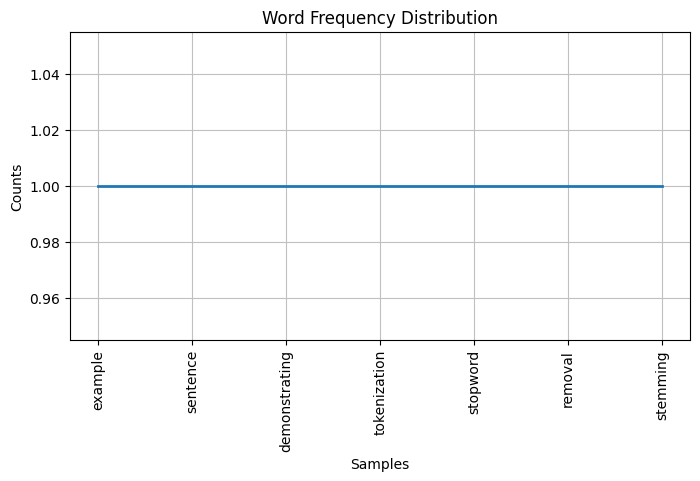

In [20]:
#  How can you visualize the frequency distribution of words in a sentence?
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Sample text
text = "This is an example sentence, demonstrating tokenization, stopword removal, and stemming!"

# Tokenization and stopword removal
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(text.lower())
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Frequency distribution
freq_dist = FreqDist(filtered_tokens)

# Plot
plt.figure(figsize=(8, 4))
freq_dist.plot(10, title="Word Frequency Distribution")  # Plot top 10 words
plt.show()

